In [2]:
from diffusers import AutoencoderKL
from datasets import load_dataset
import torch
import numpy as np
from diffusers import Mel
from IPython.display import Audio
from PIL import Image
import random

Load original and my VAE

In [7]:
vae = AutoencoderKL.from_pretrained('teticio/latent-audio-diffusion-256', subfolder='vqvae')
vae2 = AutoencoderKL.from_pretrained('models/autoencoder-kl')

Load dataset

In [4]:
ds = load_dataset("Woleek/Img2Spec", split='train')

Configure Mel 

In [5]:
mel = Mel()

Original spec and sound

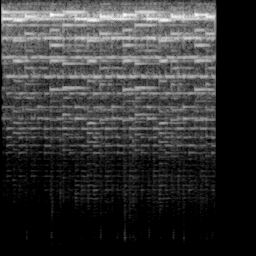

In [21]:
image = random.choice(ds)['spec']
display(image)
# prepare
input_image = np.frombuffer(image.tobytes(), dtype="uint8").reshape(
    (image.height, image.width, 1))
input_image = ((input_image / 255) * 2 - 1).transpose(2, 0, 1)
Audio(data=mel.image_to_audio(image), rate=mel.get_sample_rate())

Encode and reconstruct with original VAE

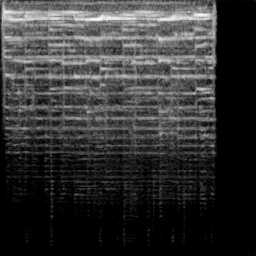

In [24]:
# encode
posterior = vae.encode(torch.tensor([input_image],
                                    dtype=torch.float32)).latent_dist
latents = posterior.sample()

# reconstruct
output_image = vae.decode(latents)['sample']
output_image = torch.clamp(output_image, -1., 1.)
output_image = (output_image + 1.0) / 2.0  # -1,1 -> 0,1; c,h,w
output_image = (output_image.detach().cpu().numpy() *
                255).round().astype("uint8").transpose(0, 2, 3, 1)[0, :, :, 0]
output_image = Image.fromarray(output_image)
display(output_image)
Audio(data=mel.image_to_audio(output_image), rate=mel.get_sample_rate())

Encode and reconstruct with my VAE

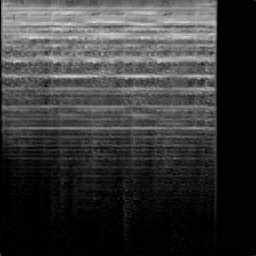

In [23]:
# encode
posterior = vae2.encode(torch.tensor([input_image],
                                    dtype=torch.float32)).latent_dist
latents = posterior.sample()

# reconstruct
output_image = vae2.decode(latents)['sample']
output_image = torch.clamp(output_image, -1., 1.)
output_image = (output_image + 1.0) / 2.0  # -1,1 -> 0,1; c,h,w
output_image = (output_image.detach().cpu().numpy() *
                255).round().astype("uint8").transpose(0, 2, 3, 1)[0, :, :, 0]
output_image = Image.fromarray(output_image)
display(output_image)
Audio(data=mel.image_to_audio(output_image), rate=mel.get_sample_rate())